# Step 0: Getting Performance Data

To use IOHinspector, your performance data should be in the IOHexperimenter format. The easiest way to achieve this is by using IOHexperimenter directly to run your benchmarks. For multi-objective problems, we have created a proof-of-concept interface with pymoo, which we use to generate the example data which we use throughout this notebook.

This small artificial dataset consists of 2 algorithms run on 2 pymoo functions. This data is included with the 'IOHinspector' package, and can also be found on the IOHdata repository. The code use to generate it can be found in 'scripts/pymoo_wrapper.py'. (For more information on running experiments with IOHexperimenter, see [this tutorial](https://github.com/IOHprofiler/IOHexperimenter/blob/master/example/tutorial.ipynb))

In a future release, we will include support for reading additional data formats, as well as support for custom loading of csv-files. IOHexperimenter will also be update to include more flexiblity in its multi-objective logging, including logging only pareto non-dominated points. 

# Step 1: Loading Data

The main component of IOHinspector is the DataManager. In essence, this is the object which handles the meta-data of the selected experiments to allow for filtering and later loading of only the required performance files. 

In [1]:
import os
import iohinspector

/home/jacob/code/IOHinspector/src/iohinspector/indicators/anytime.py:291: UserWarning: R2 indicator is N/A without pymoo installed
  warnings.warn("R2 indicator is N/A without pymoo installed")


## Initializing the DataManager

With the data loaded, we can verify whether all runs are present by checking the 'overview' attribute of the created manager

In [2]:
manager = iohinspector.DataManager()
manager.add_folder("MO_Data")

With the data loaded, we can verify whether all runs are present by checking the 'overview' attribute of the created manager

In [3]:
manager.overview

data_id,algorithm_name,algorithm_info,suite,function_name,function_id,dimension,instance,run_id,evals,best_y,popsize
u64,str,str,str,str,u16,u16,u16,u32,u64,f64,i64
1,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT2""",1,30,1,1,0,0.880968,10
2,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT2""",1,30,1,2,0,1.5653e-14,10
3,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT2""",1,30,1,3,0,1.0561e-12,10
4,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT2""",1,30,1,4,0,0.954084,10
5,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT2""",1,30,1,5,0,5.0170e-16,10
…,…,…,…,…,…,…,…,…,…,…,…
16,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,1,0,0.093118,10
17,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,2,0,0.38635,10
18,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,3,0,0.966332,10


To get some summary information, such as the loaded algorithms or functions, we can use the corresponding attributes of the datamanager:

In [4]:
manager.algorithms, manager.functions

((Algorithm(name='SMS-EMOA', info='10'),
  Algorithm(name='NSGA2', info='10'),
  Algorithm(name='NSGA2', info='10'),
  Algorithm(name='SMS-EMOA', info='10')),
 (Function(id=1, name='pymoo_ZDT2', maximization=False),
  Function(id=0, name='pymoo_ZDT1', maximization=False),
  Function(id=1, name='pymoo_ZDT2', maximization=False),
  Function(id=0, name='pymoo_ZDT1', maximization=False)))

## Filtering Data

A data manager object also allows for sub-selection of data. This can be done throught the 'select' function, where any set of function ids, algorithms etc. can be provided.
This selection also which works on the 'data_id' column from the overview, which enables more complex selection rules by utilizing the overview as a polars dataframe. 

In [5]:
#selecting on function id
manager_sub = manager.select(function_ids=[0])

In [6]:
manager_sub.overview

data_id,algorithm_name,algorithm_info,suite,function_name,function_id,dimension,instance,run_id,evals,best_y,popsize
u64,str,str,str,str,u16,u16,u16,u32,u64,f64,i64
6,"""NSGA2""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,1,0,0.128062,10
7,"""NSGA2""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,2,0,0.952323,10
8,"""NSGA2""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,3,0,0.475124,10
9,"""NSGA2""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,4,0,0.40166,10
10,"""NSGA2""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,5,0,0.88955,10
16,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,1,0,0.093118,10
17,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,2,0,0.38635,10
18,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,3,0,0.966332,10
19,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,4,0,0.596055,10


In [7]:
import polars as pl

In [8]:
#selecting based on arbitrary query on overview dataframe
ids = manager.overview.filter((pl.col('function_name') == "pymoo_ZDT1") & (pl.col('run_id') == 3))['data_id']
manager_sub2 = manager.select(ids)

In [9]:
manager_sub2.overview

data_id,algorithm_name,algorithm_info,suite,function_name,function_id,dimension,instance,run_id,evals,best_y,popsize
u64,str,str,str,str,u16,u16,u16,u32,u64,f64,i64
8,"""NSGA2""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,3,0,0.475124,10
18,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,3,0,0.966332,10


## Loading in Performance Data

With a given data manager, we have the option to load all corresponding performance data into memory, using the 'load' function. This function has the option to make the performance data monotonic (which is useful for single-objective data, but should be used with caution in this multi-objective context), whether to include the meta-data (e.g. data about the algorithms and problems). For a more fine-grained control of which meta-data to include, the include-columns argument can be used to determine which exact columns (names as in the datamanager's overview) should be included.  

In [10]:
df = manager.load(False, True)
df

data_id,algorithm_name,algorithm_info,suite,function_name,function_id,dimension,instance,run_id,evals,best_y,popsize,evaluations,raw_y,F2
u64,str,str,str,str,u16,u16,u16,u32,u64,f64,i64,u64,f64,f64
1,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT2""",1,30,1,1,0,0.880968,10,1,0.548814,6.191841
1,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT2""",1,30,1,1,0,0.880968,10,2,0.264556,5.109776
1,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT2""",1,30,1,1,0,0.880968,10,3,0.15897,4.839541
1,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT2""",1,30,1,1,0,0.880968,10,4,0.318569,5.878796
1,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT2""",1,30,1,1,0,0.880968,10,5,0.725254,5.937132
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
20,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,5,0,0.98228,10,2006,0.000036,1.473274
20,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,5,0,0.98228,10,2007,0.750389,0.416223
20,"""SMS-EMOA""","""10""","""unknown_suite""","""pymoo_ZDT1""",0,30,1,5,0,0.98228,10,2008,0.063673,1.136313


## Step 2: Indicators over time

To illustrate how to go from the DataManager object to the first plot type, we start by loading data for a single population size value. Then, we can manipulate it just as any polars dataframe (or convert to Pandas if that is your prefered dataFrame library). Here, we will make use of the 'add_normalized_objective' helper function from the 'metrics' module, which will add columns ['obj1', 'obj2', ...] as normalized versions of the provided objective columns. 

### Hypervolume

Given this normalized data, we can now add our hypervolume indicator. Since calculating anytime hypervolume can be quite time-consuming, we generally only perform this calculation for the runtime-values which will be included in our plot. To get these values, we can use the 'get_sequence' function, indicating minimum, maximum and number of steps on which we want to plot our runtime-axis. 
Adding the hypervolume indicator at certain steps can be done using the 'add_indicator' function, where an instantiation of the Anytime_Hypervolume class is provided. This class is the one which should receive the reference point, which we set to 1 + 0.1 for each normalized objective in our experiments. 

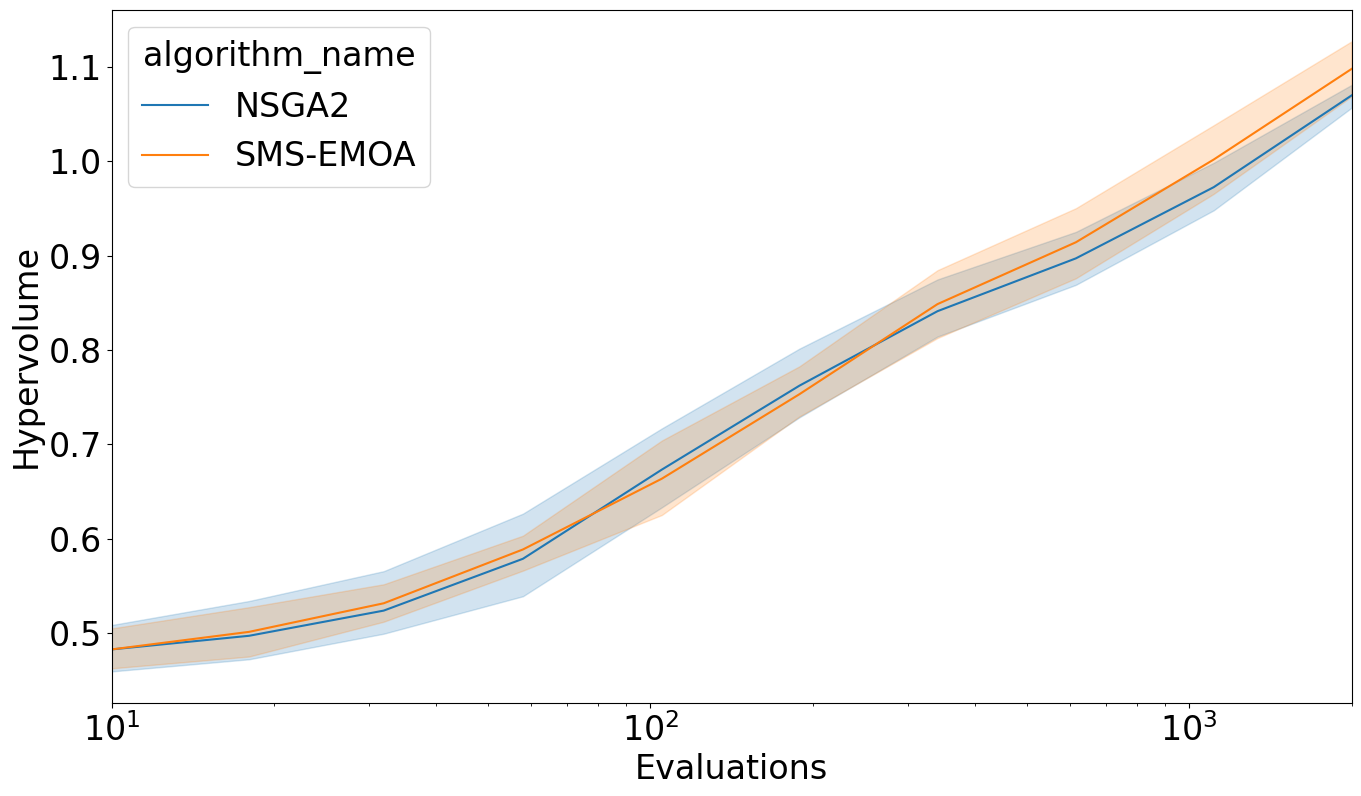

In [18]:
import matplotlib.pyplot as plt
import seaborn as sbs

popsize  = 100
funcname = 'pymoo_ZDT1'

df = manager.select(function_ids=[0]).load(False, True)
#Currently, this normalization function assumes that our function was already scaled to have all 0's as the ideal point.
df = iohinspector.metrics.add_normalized_objectives(df, obj_cols = ['raw_y', 'F2'])

#The cast-to-int is there to handle data type differences and prevent duplicate values for function evaluation count
evals = iohinspector.metrics.get_sequence(10, 2000, 10, cast_to_int=True, scale_log=True)

hv_indicator = iohinspector.indicators.anytime.HyperVolume(reference_point = [1.1, 1.1])
df_hv = iohinspector.indicators.add_indicator(df, hv_indicator, objective_columns = ['obj1', 'obj2'], evals = evals)

plt.figure(figsize=(16,9))
sbs.lineplot(df_hv.to_pandas(), x='evaluations', y=hv_indicator.var_name, hue='algorithm_name')
plt.ylabel("Hypervolume")
plt.xlim(10, 2000)
plt.xlabel("Evaluations")
plt.xscale('log')

As seen in the cell above, when plotting, we convert the polars dataframe to pandas, and use seaborn as our plotting interface. Note that specific helper functions for plotting are also available, to further simplify creating standard plots, which handle this internally. An example of this is shown in the cell below. Note that for further customizability, this function returns the exact data used for plotting as a pandas dataframe.


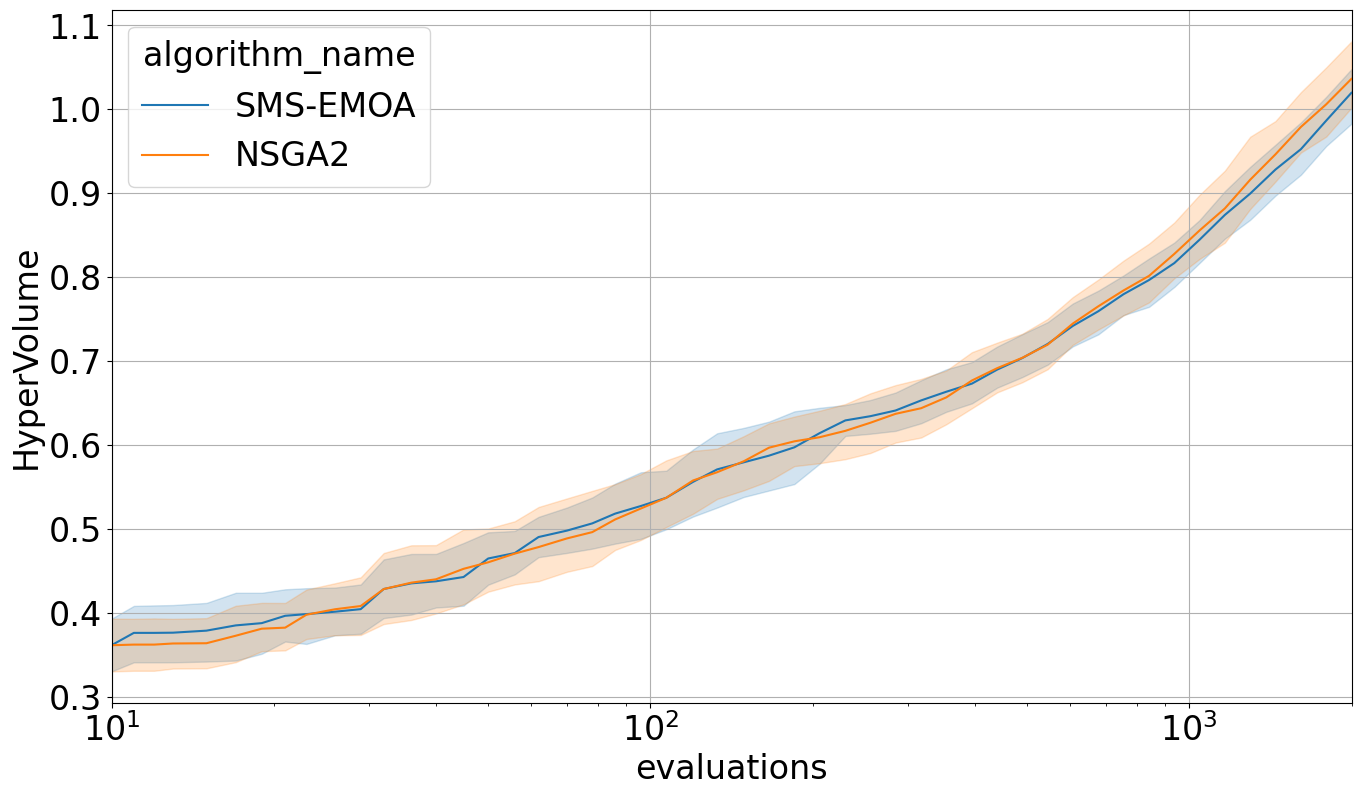

In [12]:
df = manager.select(function_ids=[1]).load(False, True)
df = iohinspector.metrics.add_normalized_objectives(df, obj_cols = ['raw_y', 'F2'])
hv_indicator = iohinspector.indicators.anytime.HyperVolume(reference_point = [1.1, 1.1])

df_hv = iohinspector.plot.plot_indicator_over_time(
    df, ['obj1', 'obj2'], hv_indicator, 
    evals_min=10, evals_max=2000, nr_eval_steps=50, free_variable='algorithm_name'
)

### IGD+

Similar to hypervolume, we can calculate IGD+ at a subsampled set of runtime values. However, IGD+ requires a reference set instead of a single point. While for the functions we use from pymoo, some reference sets are provided, this might not generally be the case for any problem. As such, we sometimes need to estimate the reference set from the existing performance data. This leads to an important tradeoff: to get the most accurate reference set, we need to filter the final non-dominated points from all runs on the chosen problem, which can become quite a large set. Subsequent usage of this large reference set for IGD+ calculation can become very CPU-intensive. Because of this, we provide the option to subsample the non-dominated points down to a small subset. 



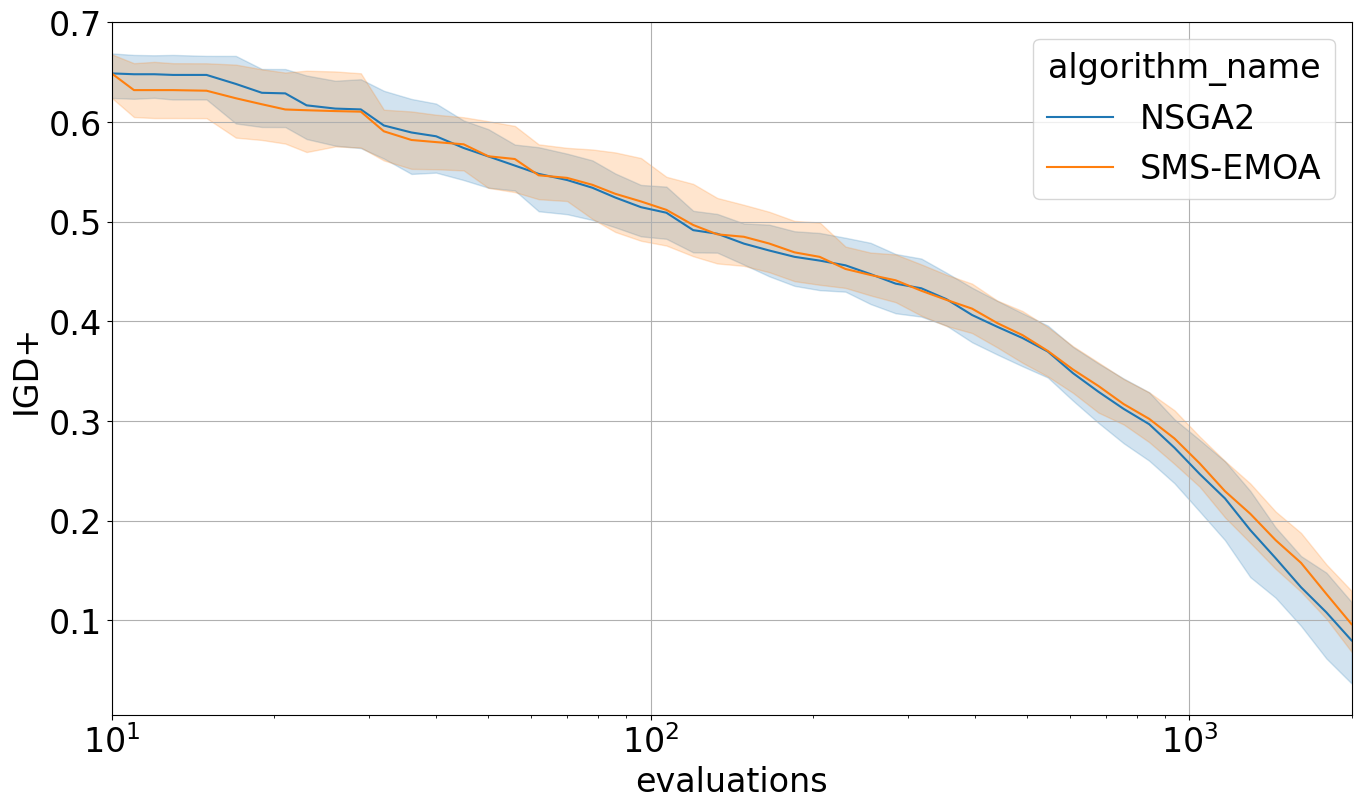

In [13]:
df = manager.select(function_ids=[1]).load(False, True)
df = iohinspector.metrics.add_normalized_objectives(df, obj_cols = ['raw_y', 'F2'])
ref_set = iohinspector.indicators.get_reference_set(df, ['obj1', 'obj2'], 1000)

igdp_indicator = iohinspector.indicators.anytime.IGDPlus(reference_set = ref_set)

df_igdp = iohinspector.plot.plot_indicator_over_time(
    df, ['obj1', 'obj2'], igdp_indicator, 
    evals_min=10, evals_max=2000, nr_eval_steps=50, free_variable='algorithm_name'
)

## Step 3: Aggregation via the ECDF

After calculating the indicator values, for example hypervolume, we can also aggregate performance across multiple functions. To avoid problems related to different scaling of indicators between functions (here: between the 2 and 3-objective problems), we can transform the objective values to [0,1]. This is similar to the common ECDF-curves which are used in single-objective optimization (when the target-based version is replaced by a normalization / other transformation function). The resulting curves then showcase the overall performance of the selected algorithm over the full set of aggregated benchmark problems.  

Note: More convenience functions for plotting ECDFs and related visualizations will be added in a future release

In [14]:
df = manager.load(False, True)
df = iohinspector.metrics.add_normalized_objectives(df, obj_cols = ['raw_y', 'F2'])
evals = iohinspector.metrics.get_sequence(10, 2000, 2000, cast_to_int=True, scale_log=False)
hv_indicator = iohinspector.indicators.anytime.HyperVolume(reference_point = [1.1, 1.1])
df_hv = iohinspector.indicators.add_indicator(df, hv_indicator, objective_columns = ['obj1', 'obj2'], evals = evals)
df_hv = df_hv.with_columns((pl.col('HyperVolume')/1.21).alias('eaf'))

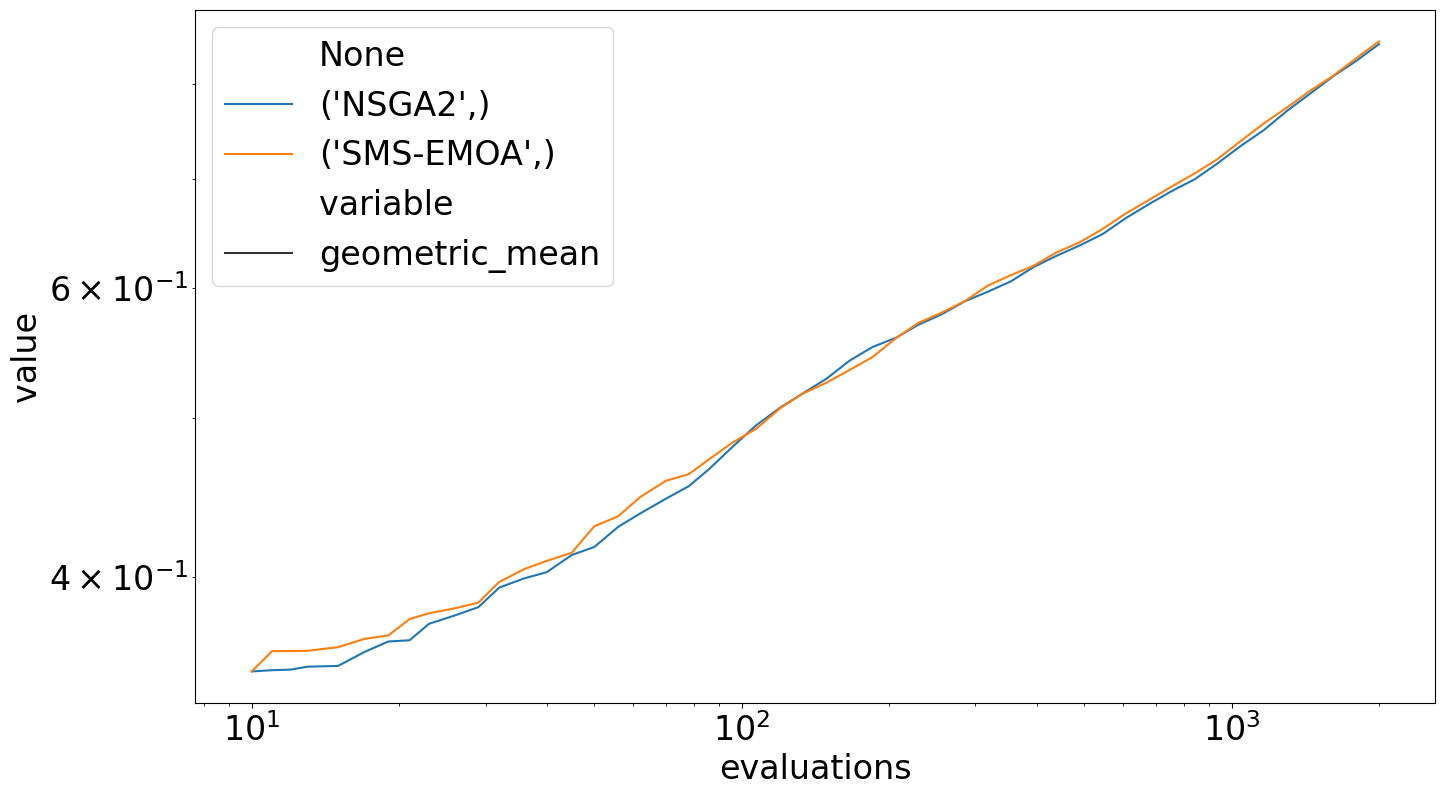

In [15]:
_ = iohinspector.plot.single_function_fixedbudget(df_hv, fval_variable='eaf', maximization=True)

## Step 4: Plotting the empirical attainment

In addition to the over-time analyses, we can also create more standard visualizations. For example, we can plot the EAF, both for the full set of non-dominated points found as well as for the final population only. This can be done here thanks to the way in which we set up our experiments, where after the full budget is used we evaluate the final population (the output of the algoritm) again. By filtering based on evaluation number we can thus distinguish what evaluations belong to the final set proposed by the algorithm. 

In addition to plotting these EAF's separately, we can calculate the EAF-differences and visualize them. 


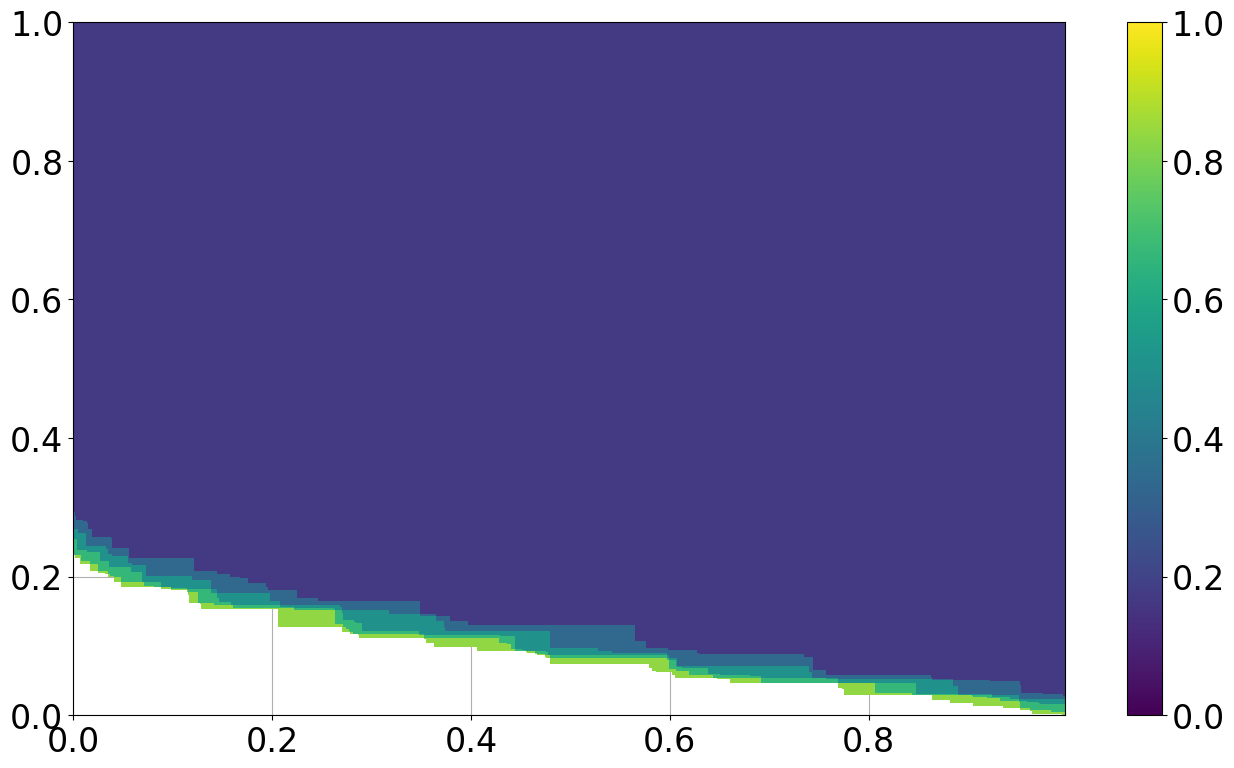

In [16]:
df = manager.select(function_ids=[0], algorithms=['NSGA2']).load(False, False)
df = iohinspector.metrics.add_normalized_objectives(df, obj_cols = ['raw_y', 'F2'])
iohinspector.plot.plot_eaf_pareto(df, 'obj1', 'obj2', scale_xlog=False, scale_ylog=False)

## Step 5: Robust Ranking

The final visualization we highlight here consists of a robust ranking plot generated at several different budgets. For this, we use the 'robustranking' package. 

/home/jacob/code/IOHinspector/venv/lib/python3.10/site-packages/robustranking/comparison/abstract_comparison.py:45: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")
/home/jacob/code/IOHinspector/venv/lib/python3.10/site-packages/robustranking/comparison/bootstrap_comparison.py:67: UserWarning: There are only 252 unique samples possible,  which is less than the requested 1000 bootstrap samples. Duplicate samples are inevitable. Consider increasing the number of instances or reducing the number of bootstraps.
  warnings.warn(f"There are only {binom(2*num_instances, num_instances):.0f} unique samples possible,  "
/home/jacob/code/IOHinspector/venv/lib/python3.10/site-packages/robustranking/comparison/abstract_comparison.py:45: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")
/home/jacob/code/IOHinspector/venv/lib/python3.10/site-packages/robustranking/comparison/bootstrap_comp

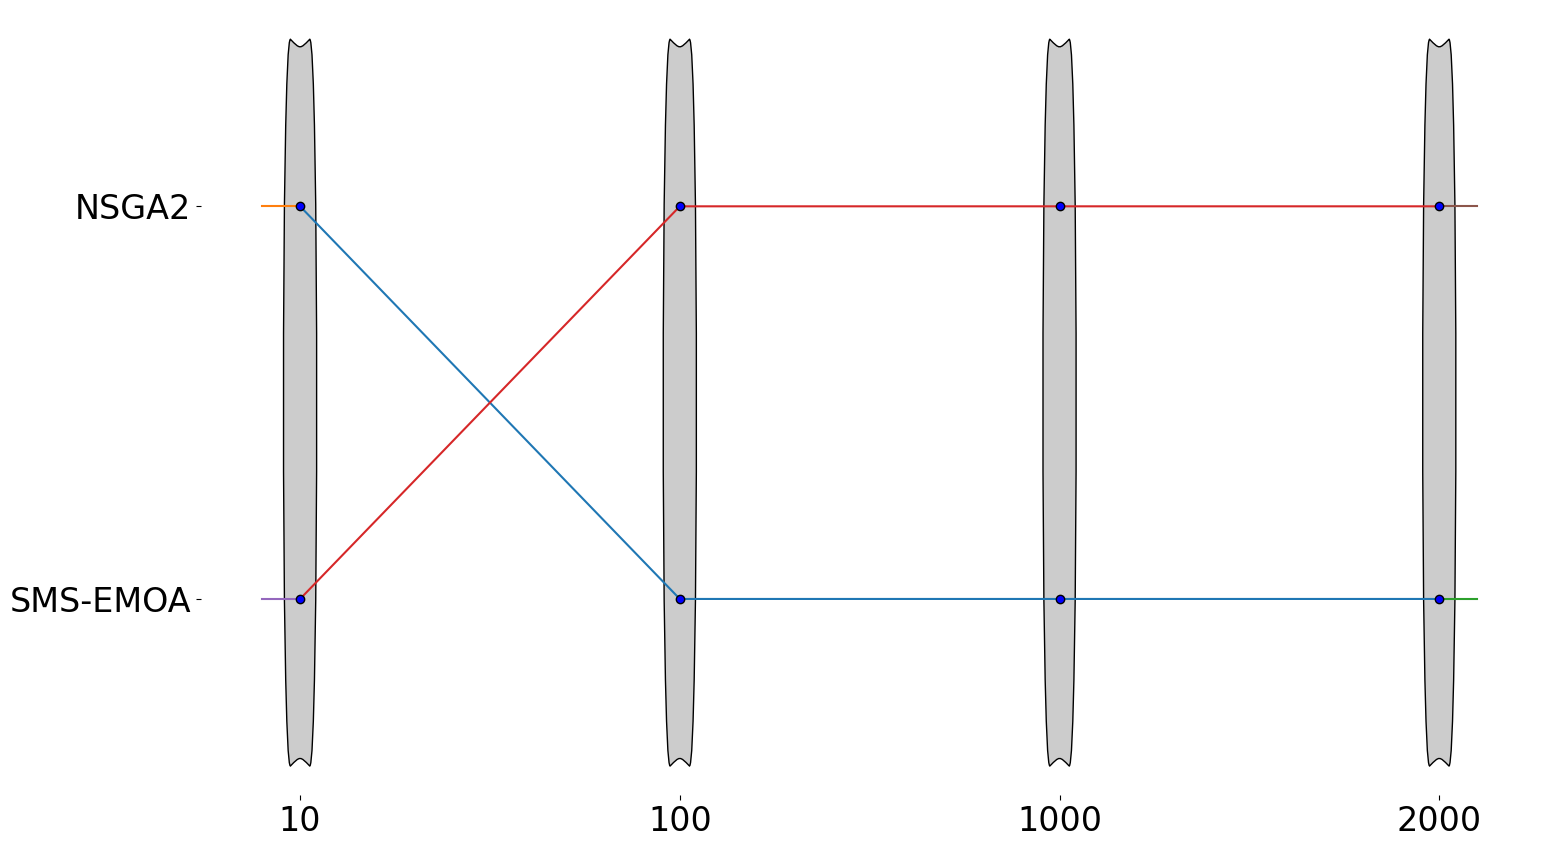

In [ ]:
df = manager.select(function_ids=[0]).load(False, True)
df = iohinspector.metrics.add_normalized_objectives(df, obj_cols = ['raw_y', 'F2'])

#The cast-to-int is there to handle data type differences and prevent duplicate values for function evaluation count
evals = [10,100,1000,2000]

ref_set = iohinspector.indicators.get_reference_set(df, ['obj1', 'obj2'])

igdp_indicator = iohinspector.indicators.anytime.IGDPlus(reference_set = ref_set)


iohinspector.plot.plot_robustrank_changes(df, ['obj1', 'obj2'], evals, igdp_indicator)

# Further analysis
This tutorial is a work-in-progress, more examples will be added in future releases. 